In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns
import glob 
import sys
import os
import torch
import warnings

%matplotlib inline
sns.set(style="whitegrid")
warnings.simplefilter("ignore")

#### CIFAR-10 - VGG11

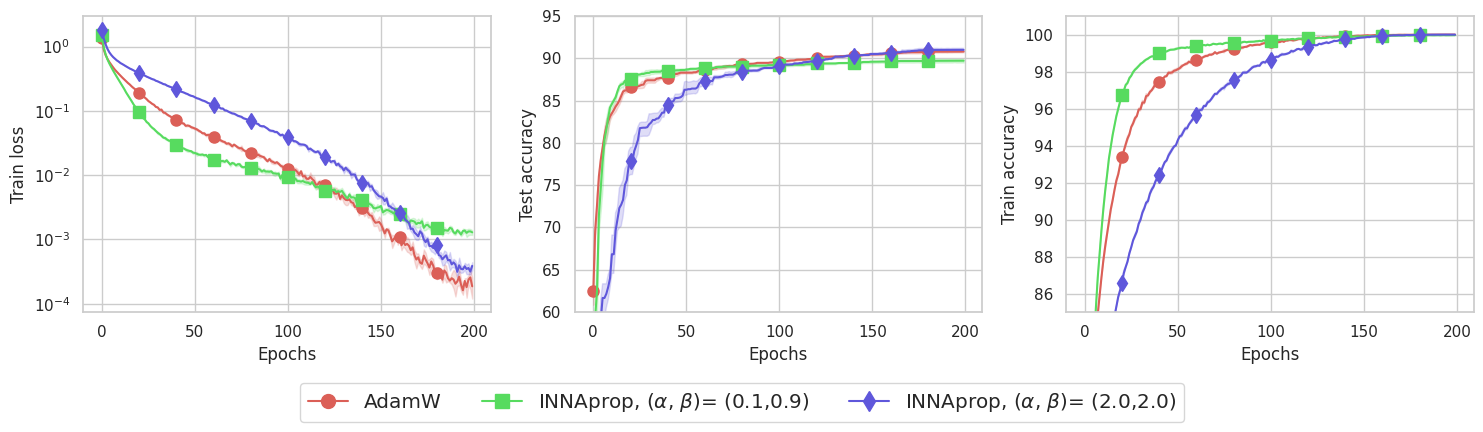

In [9]:
path = 'train/cifar10/vgg11'
all_files = glob.glob(path + '/*/*.csv')
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

selected_values = ['AdamW',
                    'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)',
                   'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)'
                  ]

mask = df['optimizer'].isin(selected_values)
df = df[mask]
# Define custom palette and markers
palette = sns.color_palette("hls", len(selected_values))
markers = {'AdamW': 'o', 
           'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)': 's',
           'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)': 'd'
          }

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Specific settings for each metric
metric_settings = {
    'train_loss': {'yscale': 'log', 'ylim': None},
    'test_accuracy': {'yscale': None, 'ylim': (60, 95)},
    'train_accuracy': {'yscale': None, 'ylim': (85, 101)}
}

# Marker size adjustment
marker_size = 8  # Smaller value for smaller markers

# Plotting
for metric, axis in zip(metric_settings.keys(), ax):
    for optimizer in selected_values:
        subset = df[df['optimizer'] == optimizer]
        subset2 = df[df['optimizer'] == optimizer].groupby(['optimizer', 'epoch']).mean().reset_index()

        
        # Line plot for the smooth line
        sns.lineplot(data=subset, x='epoch', y=metric, hue='optimizer', style='optimizer',
                     dashes=False, errorbar=('ci',95), estimator='mean', palette=[palette[selected_values.index(optimizer)]], legend=False,
                      ax=axis)
        
        marker_subset = subset2[subset2['epoch'] % 20 == 0]
        for _, row in marker_subset.iterrows():
            axis.plot(row['epoch'], row[metric], markers[optimizer], color=palette[selected_values.index(optimizer)], markersize=marker_size)

    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])
    # Apply yscale and ylim settings
    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])

    axis.set_xlabel('Epochs')
    axis.set_ylabel(metric.replace('_', ' ').capitalize())

# Add a custom legend outside the plot
legend_handles = [mlines.Line2D([], [], color=palette[i], marker=markers[optimizer],
                                markersize=10, label=optimizer) for i, optimizer in enumerate(selected_values)]

# Adding the custom legend to the figure
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(selected_values), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom to accommodate the legend
plt.savefig('vgg11_cifar10.pdf', bbox_inches='tight')
plt.show()

#### CIFAR-10 - ResNet18

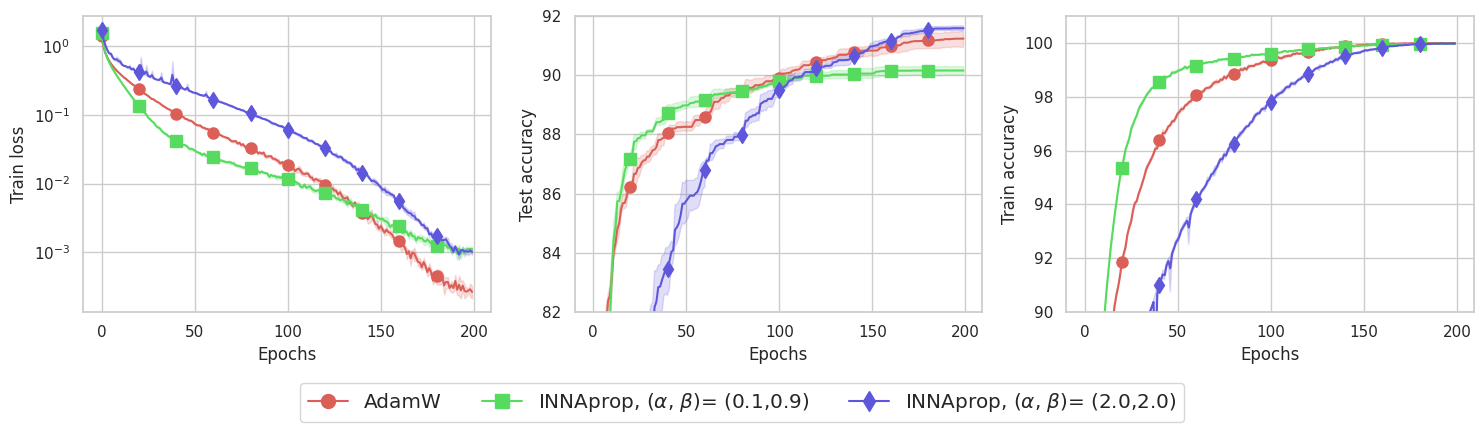

In [3]:
path = 'train/cifar10/resnet18'
all_files = glob.glob(path + '/*/*.csv')
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

selected_values = ['AdamW',
                    'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)',
                   'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)'
                  ]

mask = df['optimizer'].isin(selected_values)
df = df[mask]
# Define custom palette and markers
palette = sns.color_palette("hls", len(selected_values))
markers = {'AdamW': 'o', 
           'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)': 's',
           'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)': 'd'
          }

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Specific settings for each metric
metric_settings = {
    'train_loss': {'yscale': 'log', 'ylim': None},
    'test_accuracy': {'yscale': None, 'ylim': (82, 92)},
    'train_accuracy': {'yscale': None, 'ylim': (90, 101)}
}

# Marker size adjustment
marker_size = 8  # Smaller value for smaller markers

# Plotting
for metric, axis in zip(metric_settings.keys(), ax):
    for optimizer in selected_values:
        subset = df[df['optimizer'] == optimizer]
        subset2 = df[df['optimizer'] == optimizer].groupby(['optimizer', 'epoch']).mean().reset_index()

        
        # Line plot for the smooth line
        sns.lineplot(data=subset, x='epoch', y=metric, hue='optimizer', style='optimizer',
                     dashes=False, errorbar=('ci',95), estimator='mean', palette=[palette[selected_values.index(optimizer)]], legend=False,
                      ax=axis)
        
        marker_subset = subset2[subset2['epoch'] % 20 == 0]
        for _, row in marker_subset.iterrows():
            axis.plot(row['epoch'], row[metric], markers[optimizer], color=palette[selected_values.index(optimizer)], markersize=marker_size)

    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])

    axis.set_xlabel('Epochs')
    axis.set_ylabel(metric.replace('_', ' ').capitalize())

# Add a custom legend outside the plot
legend_handles = [mlines.Line2D([], [], color=palette[i], marker=markers[optimizer],
                                markersize=10, label=optimizer) for i, optimizer in enumerate(selected_values)]

# Adding the custom legend to the figure
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(selected_values), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom to accommodate the legend
plt.savefig('resnet18_cifar10.pdf', bbox_inches='tight')
plt.show()  

#### ImageNet -- ResNet18

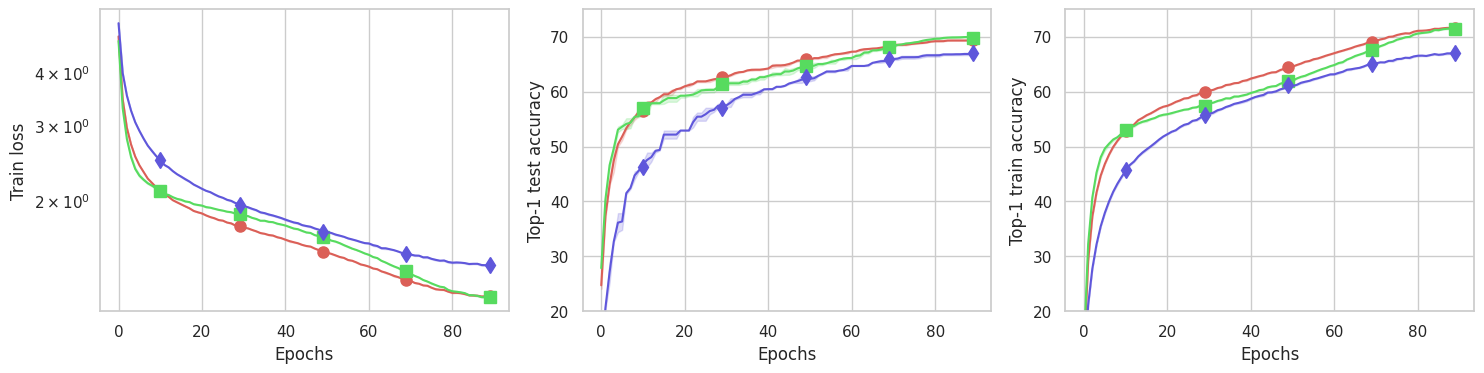

In [2]:
path = 'train/imagenet/resnet18'
all_files = glob.glob(path + '/*/*.csv')  # Cela inclut tous les fichiers CSV dans des sous-dossiers
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

df['optimizer'] = df['optimizer'].replace('AdamW , lr = 0.001, wd = 0.01', 'AdamW')
df['optimizer'] = df['optimizer'].replace('INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9), lr = 0.001, wd = 0.01', 'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)')
df['optimizer'] = df['optimizer'].replace('INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0), lr = 0.001, wd = 0.01', 'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)')

selected_values = ['AdamW',
                    'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)',
                   'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)'
]
mask = df['optimizer'].isin(selected_values)
df = df[mask]


# Define custom palette and markers
palette = sns.color_palette("hls", len(selected_values))
markers = {'AdamW': 'o', 
           'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)': 's',
          'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)': 'd'}

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Specific settings for each metric
metric_settings = {
    'train_loss': {'yscale': 'log', 'ylim': None},
    'best_acc1': {'yscale': None, 'ylim': (20, 75)},
    'train_acc1': {'yscale': None, 'ylim': (20, 75)}
}

# Marker size adjustment
marker_size = 8  # Smaller value for smaller markers

# Plotting
for metric, axis in zip(metric_settings.keys(), ax):
    for optimizer in selected_values:
        subset = df[df['optimizer'] == optimizer]
        
        # Line plot for the smooth line
        sns.lineplot(data=subset, x='epoch', y=metric, hue='optimizer', style='optimizer',
                     dashes=False,  errorbar=('ci',95), estimator='mean', palette=[palette[selected_values.index(optimizer)]], legend=False,
                      ax=axis)
        
        # Extract epochs and metric values for plotting markers
        epochs = subset['epoch'].values
        metric_values = subset[metric].values
        
        # Select points every 10 epochs for markers
        epoch_indices = np.linspace(10, 89, 5, dtype=int)  # Ajustement pour 20 points
        for i in epoch_indices:
            axis.plot(subset.iloc[i]['epoch'], subset.iloc[i][metric], markers[optimizer], 
                      color=palette[selected_values.index(optimizer)], markersize=marker_size)
    # Apply yscale and ylim settings
    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])

    axis.set_xlabel('Epochs')
    if metric == 'train_loss':
        axis.set_ylabel('Train loss')
    elif metric == 'best_acc1':
        axis.set_ylabel('Top-1 test accuracy')
    elif metric == 'train_acc1':
        axis.set_ylabel('Top-1 train accuracy') 

# Add a custom legend outside the plot
legend_handles = [mlines.Line2D([], [], color=palette[i], marker=markers[optimizer],
                                markersize=10, label=optimizer)
                  for i, optimizer in enumerate(selected_values)]
#fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(selected_values), fontsize='large')



plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom to accommodate the legend
plt.savefig('resnet18_imagenet.pdf', bbox_inches='tight')
plt.show()

### ImageNet - ResNet50

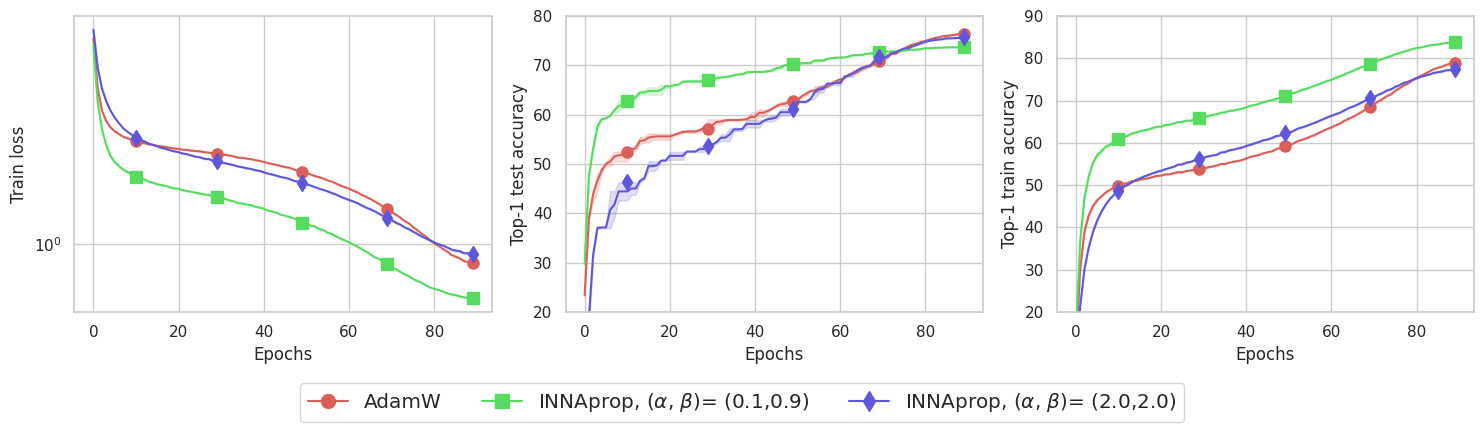

In [7]:
path = 'train/imagenet/resnet50'
all_files = glob.glob(path + '/*/*.csv')  # Cela inclut tous les fichiers CSV dans des sous-dossiers
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df['optimizer'] = df['optimizer'].replace('AdamW , lr = 0.001, wd = 0.1', 'AdamW')
df['optimizer'] = df['optimizer'].replace('INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9), lr = 0.001, wd = 0.01', 'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)')
df['optimizer'] = df['optimizer'].replace('INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0), lr = 0.001, wd = 0.1', 'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)')

selected_values = ['AdamW',
                    'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)',
                   'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)'
]
mask = df['optimizer'].isin(selected_values)
df = df[mask]


# Define custom palette and markers
palette = sns.color_palette("hls", len(selected_values))
markers = {'AdamW': 'o', 
           'INNAprop, ($\\alpha$, $\\beta$)= (0.1,0.9)': 's',
          'INNAprop, ($\\alpha$, $\\beta$)= (2.0,2.0)': 'd'}

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# Specific settings for each metric
metric_settings = {
    'train_loss': {'yscale': 'log', 'ylim': None},
    'best_acc1': {'yscale': None, 'ylim': (20, 80)},
    'train_acc1': {'yscale': None, 'ylim': (20, 90)}
}

# Marker size adjustment
marker_size = 8  # Smaller value for smaller markers

# Plotting
for metric, axis in zip(metric_settings.keys(), ax):
    for optimizer in selected_values:
        subset = df[df['optimizer'] == optimizer]
        
        # Line plot for the smooth line
        sns.lineplot(data=subset, x='epoch', y=metric, hue='optimizer', style='optimizer',
                     dashes=False,  errorbar=('ci',95), estimator='mean', palette=[palette[selected_values.index(optimizer)]], legend=False,
                      ax=axis)
        
        # Extract epochs and metric values for plotting markers
        epochs = subset['epoch'].values
        metric_values = subset[metric].values
        
        # Select points every 10 epochs for markers
        epoch_indices = np.linspace(10, 89, 5, dtype=int)  # Ajustement pour 20 points
        for i in epoch_indices:
            axis.plot(subset.iloc[i]['epoch'], subset.iloc[i][metric], markers[optimizer], 
                      color=palette[selected_values.index(optimizer)], markersize=marker_size)
    # Apply yscale and ylim settings
    if metric_settings[metric]['yscale']:
        axis.set_yscale(metric_settings[metric]['yscale'])
    if metric_settings[metric]['ylim']:
        axis.set_ylim(metric_settings[metric]['ylim'])

    axis.set_xlabel('Epochs')
    if metric == 'train_loss':
        axis.set_ylabel('Train loss')
    elif metric == 'best_acc1':
        axis.set_ylabel('Top-1 test accuracy')
    elif metric == 'train_acc1':
        axis.set_ylabel('Top-1 train accuracy') 

# Add a custom legend outside the plot
legend_handles = [mlines.Line2D([], [], color=palette[i], marker=markers[optimizer],
                                markersize=10, label=optimizer)
                  for i, optimizer in enumerate(selected_values)]
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(selected_values), fontsize='large')



plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust bottom to accommodate the legend
plt.savefig('resnet50_imagenet.pdf', bbox_inches='tight')
plt.show()